# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [187]:
# Checking the number of mice.
number_of_mice = combined_df['Mouse ID'].nunique()
number_of_mice

249

In [188]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mouse_ids = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids


array(['g989'], dtype=object)

In [189]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [190]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_mouse_ids)]
clean_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [191]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = clean_combined_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume
mean = summary_df['Tumor Volume (mm3)'].mean()
median = summary_df['Tumor Volume (mm3)'].median()
variance = summary_df['Tumor Volume (mm3)'].var()
std_dev = summary_df['Tumor Volume (mm3)'].std()
sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_table = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume SEM': sem
})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [192]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
advanced_summary_table = clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_table


,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

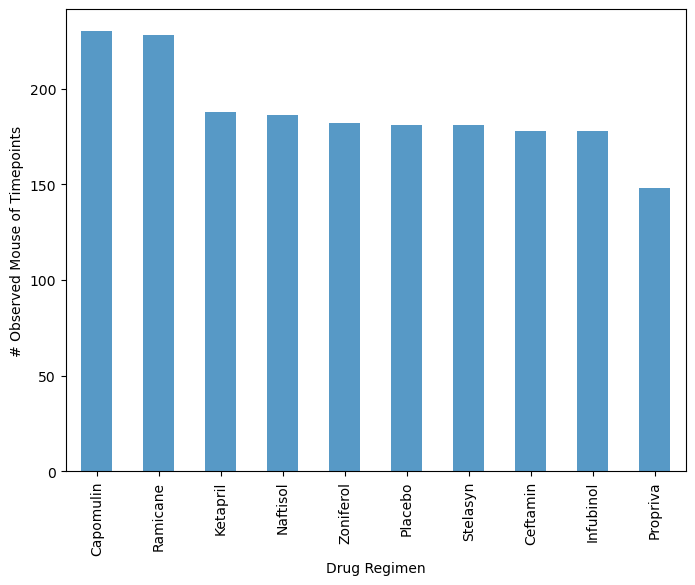

In [193]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_combined_df.groupby('Drug Regimen').size()

# Descending order
regimen_counts_sorted = regimen_counts.sort_values(ascending=False)
regimen_counts_sorted.plot(kind='bar', figsize=(8, 6), alpha=0.75)
plt.xlabel('Drug Regimen')
plt.ylabel('# Observed Mouse of Timepoints')

# Display the plot
plt.show()

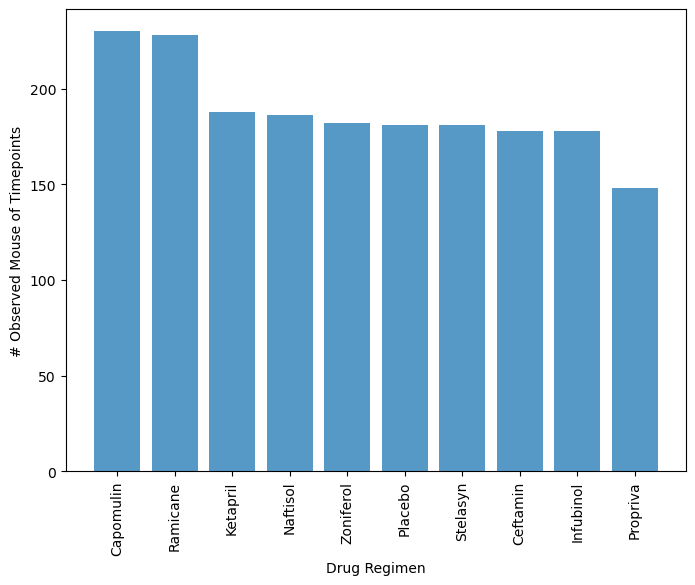

In [194]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_combined_df.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False)

# Get the names of drug regimens for the x-axis labels
regimen_names = regimen_counts.index

# Generate a bar plot using pyplot
plt.figure(figsize=(8, 6))
plt.bar(regimen_names, regimen_counts, alpha=0.75)
plt.xlabel('Drug Regimen')
plt.ylabel('# Observed Mouse of Timepoints')
plt.xticks(rotation=90) 

# Display the plot
plt.show()

<Axes: ylabel='Sex'>

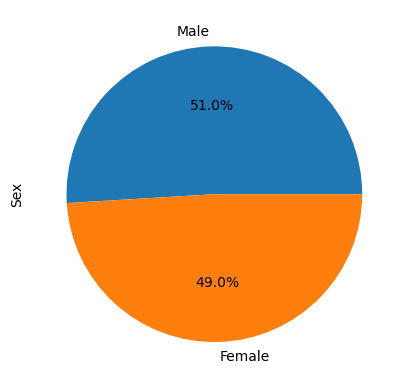

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by 'Sex' & count the number of each categories
sex_counts = clean_combined_df['Sex'].value_counts()

# Generate a bar plot showing the distribution of female versus male mice
sex_percentages.plot(kind='pie', autopct='%1.1f%%', labels=sex_percentages.index)


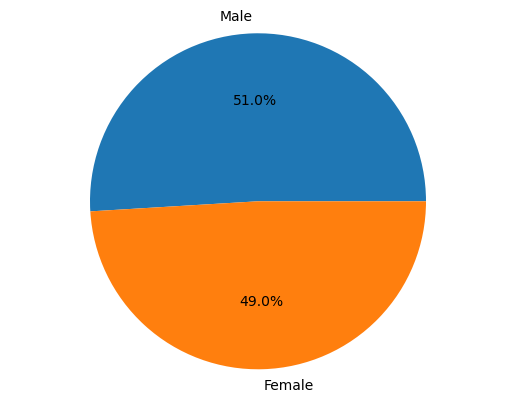

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_counts.index # label
sizes = sex_counts.values # counts of each class

# Setting up the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



## Quartiles, Outliers and Boxplots

In [197]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame for rows where the treatment regimen matches one of the treatments in the list
filtered_df = clean_combined_df[clean_combined_df['Drug Regimen'].isin(four_treatment)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_combined_df, on=['Mouse ID', 'Timepoint'], how='left')

In [198]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
 
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []  

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    final_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(final_volume)

    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"\n{treatment}:")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes

    if not outliers.empty:
        print(f"Potential outliers for {treatment}: {outliers.tolist()}")
    else:
        print("No potential outliers found.")



Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No potential outliers found.

Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No potential outliers found.

Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 co

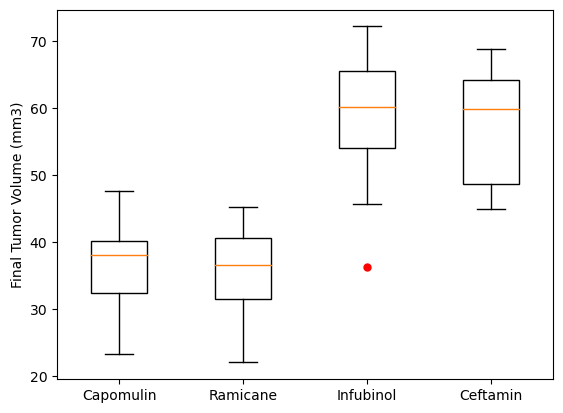

In [199]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define box properties for white fill and black edge
boxprops = dict(edgecolor='black', linewidth=1, facecolor='white') 
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none', markeredgecolor='red')

# Generate the box plot with specified properties
plt.boxplot(tumor_vol_data, patch_artist=True, flierprops=flierprops, boxprops=boxprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(ticks=range(1, len(treatment_list) + 1), labels=treatment_list)  # Labels for each treatment

# Show grid for better readability
# plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Display
plt.show()


## Line and Scatter Plots

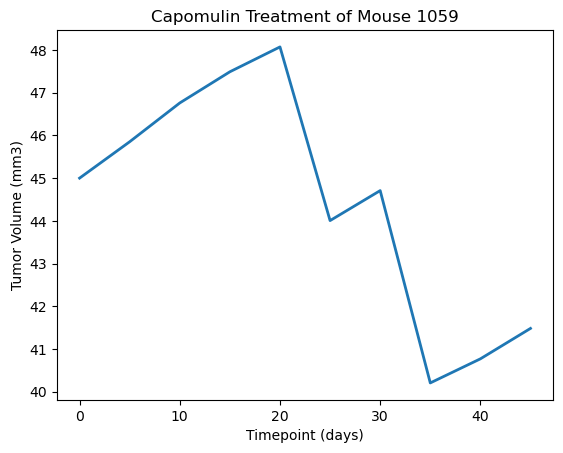

In [200]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter your dataset to include only data for mice treated with Capomulin.
capomulin_df = clean_combined_df[clean_combined_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin.
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == 'l509']

# Plot the data for the mouse across the different time points
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-',linewidth=2)
plt.title('Capomulin Treatment of Mouse 1059')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


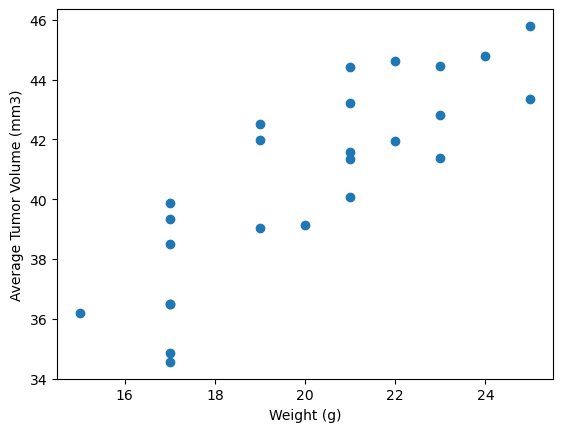

In [201]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by 'Mouse ID' & calculate the average tumor volume
avg_tumor_vol = capomulin_df.groupby('Mouse ID').agg(Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'))

# merge 
capomulin_avg = pd.merge(avg_tumor_vol, capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Average_Tumor_Volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and mean tumor volume is: 0.84


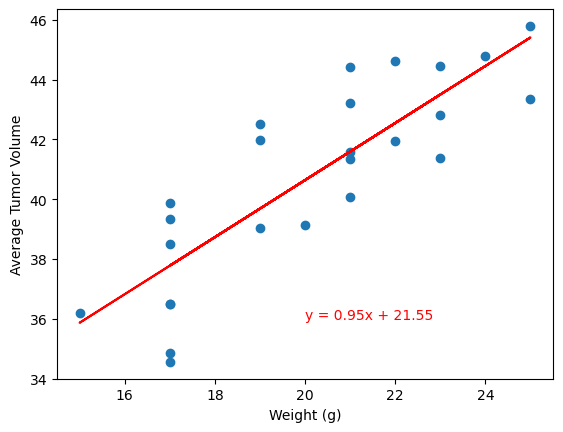

In [215]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_avg['Weight (g)'].corr(capomulin_avg['Average_Tumor_Volume'])
print(f"The correlation coefficient between mouse weight and mean tumor volume is: {correlation:.2f}")

# Perform linear regression
(slope, intercept, r_value, p_value, stderr) = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Average_Tumor_Volume'])

# Create equation of the line to calculate predicted tumor volume
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# Create the scatter plot
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Average_Tumor_Volume'])
plt.plot(capomulin_avg['Weight (g)'], intercept + slope*capomulin_avg['Weight (g)'], "r-")
plt.annotate(line_eq, (20,36), color="red")

# Label the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()
